In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

readind the data set

In [3]:
data=pd.read_csv("dataset_med.csv")
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [4]:
#convert age column into integer type
data["age"]=data["age"].astype('int')

In [5]:
# Convert date columns to datetime
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'])

In [6]:
# Convert date columns to datetime
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'])

In [7]:
#creation of new column treatment_duration 
data['treatment_duration'] = (data['end_treatment_date'] - data['diagnosis_date']).dt.days
data['treatment_duration']

0         523
1         424
2         370
3         443
4         406
         ... 
889995    237
889996    631
889997    302
889998    721
889999    450
Name: treatment_duration, Length: 890000, dtype: int64

In [8]:
#creating a column showing treatment completion status
data['treatment_completed'] = data['end_treatment_date'].notna().astype(int)

In [10]:
# creating age_group column to dataframe

data['age_group'] = pd.cut(data['age'], bins=[0, 40, 60, 80, 120], labels=['0-40', '41-60', '61-80', '81+'])

PATIENT DEMOGRAPHICS AND GEOGRAPHIC ANALYSIS

1) What is the age distribution of patients across different cancer stages?
 lexical answer (summary)

In [11]:
age_stats = pd.crosstab(data['age_group'],data['cancer_stage'],normalize='index')*100
print("\nAge Distribution Statistics by Cancer Stage (%):")
age_stats


Age Distribution Statistics by Cancer Stage (%):


cancer_stage,Stage I,Stage II,Stage III,Stage IV
age_group,,,,
0-40,25.118360,24.865552,25.103038,24.913049
41-60,25.037111,24.968639,24.939446,25.054804
61-80,24.888611,25.058982,25.144952,24.907454
81+,25.266013,24.535781,24.994784,25.203422


 2) How many male and female patients are there, and what is the average age for each gender?

In [9]:
gender_count=data['gender'].value_counts()
print("COUNT OF MALE AND FEMALE PATIENTS.")
print(gender_count)
print()
avg_gender=data.groupby('gender')['age'].mean()
print("AVERAGE AGE FOR EACH GENDER.")
print(avg_gender)

COUNT OF MALE AND FEMALE PATIENTS.
gender
Male      445134
Female    444866
Name: count, dtype: int64

AVERAGE AGE FOR EACH GENDER.
gender
Female    55.016457
Male      54.997565
Name: age, dtype: float64


3) significant gender-based differences in survival rates, treatment types, or cancer stage at diagnosis?

In [9]:
lis=['cancer_stage','survived','treatment_type']
significance=data.groupby('gender')[lis].count()
print(significance)

        cancer_stage  survived  treatment_type
gender                                        
Female        444866    444866          444866
Male          445134    445134          445134


4)Which countries have the most patients and show the best survival rates?

In [85]:
#no of patients per country
count = data.groupby('country')['id'].count().reset_index(name='patient_count')
count = count.sort_values(by='patient_count', ascending=False)

# survival rates per country
survival = data.groupby('country')['survived'].mean().reset_index(name='survival_rate')
survival['survival_rate'] = survival['survival_rate'] * 100  
survival = survival.sort_values(by='survival_rate', ascending=False)

country_stats = pd.merge(count, survival, on='country')
country_stats = country_stats[country_stats['patient_count'] >= 10]
top_countries = country_stats.sort_values(by=['patient_count', 'survival_rate'], ascending=[False, False])
print("\nTOP 7 COUNTRIES BY PATIENT COUNT AND THEIR SURVIVAL RATES:\n")
print(top_countries.head(7))


TOP 7 COUNTRIES BY PATIENT COUNT AND THEIR SURVIVAL RATES:

    country  patient_count  survival_rate
0     Malta          33367      22.255522
1   Ireland          33243      21.902355
2  Portugal          33208      22.199470
3    France          33199      21.575951
4    Sweden          33161      21.606707
5   Croatia          33138      21.989861
6    Greece          33052      21.950260


5)Does age at diagnosis vary across different countries or stages, and how does this affect treatment decisions?

In [35]:
# average age of patients by country

avg_age_country=data.groupby('country')['age'].mean().round(1)
avg_age_country.sort_values(ascending=False)

country
Ireland           55.1
Bulgaria          55.1
Estonia           55.1
Poland            55.1
France            55.1
Germany           55.1
Italy             55.1
Latvia            55.0
Slovenia          55.0
Slovakia          55.0
Romania           55.0
Portugal          55.0
Netherlands       55.0
Malta             55.0
Lithuania         55.0
Austria           55.0
Greece            55.0
Czech Republic    55.0
Croatia           55.0
Sweden            55.0
Belgium           54.9
Luxembourg        54.9
Hungary           54.9
Finland           54.9
Denmark           54.9
Cyprus            54.9
Spain             54.9
Name: age, dtype: float64

In [36]:
# average age by cancer stage

avg_age_stage=data.groupby('cancer_stage')['age'].mean().round(2)
avg_age_stage

cancer_stage
Stage I      54.99
Stage II     55.00
Stage III    55.02
Stage IV     55.01
Name: age, dtype: float64

In [10]:
# relating treatment type with age groups

treatment_by_age=pd.crosstab(data['age_group'],data['treatment_type'],normalize="index")*100
treatment_by_age

treatment_type,Chemotherapy,Combined,Radiation,Surgery
age_group,,,,
0-40,25.153600,25.273109,24.735318,24.837973
41-60,25.030387,25.004025,24.859121,25.106467
61-80,25.201481,24.960842,24.741009,25.096668
81+,24.514918,25.161694,24.932193,25.391195


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x700 with 0 Axes>

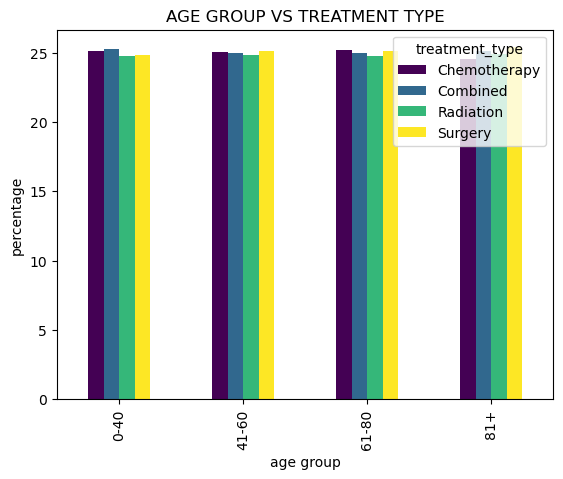

In [45]:
# plotting stacked plot

plt.figure(figsize=(10,7))
treatment_by_age.plot(kind='bar',stacked=False,cmap="viridis",)
plt.title("AGE GROUP VS TREATMENT TYPE")
plt.xlabel("age group")
plt.ylabel("percentage")
print()
plt.show

II) CANCER STAGE AND SURVIVAL ANALYSIS

1) What are the survival rates across different cancer stages (Stage I to IV)?

In [20]:
survival_rate=data.groupby('cancer_stage')['survived'].mean()*100
print("SURVIVAL RATES OF DIFFERENT CANCER STAGES:\n")
survival_rate

SURVIVAL RATES OF DIFFERENT CANCER STAGES:



cancer_stage
Stage I      21.813263
Stage II     22.089107
Stage III    22.052706
Stage IV     22.136640
Name: survived, dtype: float64

2) which cancer stage has the highest death rate?

In [19]:
death_rate=(1-data.groupby('cancer_stage')['survived'].mean())*100
print("DEATH RATES OF DIFFERENT CANCER STAGES:\n")
death_rate

DEATH RATES OF DIFFERENT CANCER STAGES:



cancer_stage
Stage I      78.186737
Stage II     77.910893
Stage III    77.947294
Stage IV     77.863360
Name: survived, dtype: float64

3) How does survival probability change across different age groups?

In [83]:
#creating survival probability for each age group

probability=data.groupby('age_group',observed=True)['survived'].mean()*100
probability=probability.reset_index(name="survival_probability")
print("\nsurvival probability change across different age groups\n")
probability


survival probability change across different age groups



,age_group,survival_probability
0,0-40,21.828310
1,41-60,22.012354
2,61-80,22.082725
3,81+,21.896306


4) What is the impact of early-stage vs late-stage diagnosis on survival outcomes?

In [64]:
df=data[['survived','cancer_stage']].copy()
df['grouped_stage']=df['cancer_stage'].map({'Stage I':'early_stage','Stage II':'early_stage','Stage III':'late_stage','Stage IV':'late_stage'})
df

,survived,cancer_stage,grouped_stage
0,0,Stage I,early_stage
1,1,Stage III,late_stage
2,0,Stage III,late_stage
3,0,Stage I,early_stage
4,0,Stage I,early_stage
...,...,...,...
889995,0,Stage IV,late_stage
889996,0,Stage II,early_stage
889997,1,Stage III,late_stage
889998,0,Stage IV,late_stage


In [73]:
survival_rate=df.groupby('grouped_stage')['survived'].mean()*100
survival_rate=survival_rate.reset_index(name="survival_rate")
print("\nimpact of early-stage vs late-stage diagnosis on survival outcomes\n")
survival_rate


impact of early-stage vs late-stage diagnosis on survival outcomes



,grouped_stage,survival_rate
0,early_stage,21.951137
1,late_stage,22.094666


5) How is cancer stage distributed among patients at the time of diagnosis?

In [58]:
# creating a dataframe to show count and percentage of patients for each cancer stage

stage_count=data['cancer_stage'].value_counts().reset_index(name='count')
total_patients=stage_count['count'].sum()
stage_count['percentage']=(stage_count['count']/total_patients*100).round(2)
stage_count.sort_values(by='cancer_stage')

,cancer_stage,count,percentage
2,Stage I,222516,25.00
3,Stage II,222363,24.98
0,Stage III,222594,25.01
1,Stage IV,222527,25.00


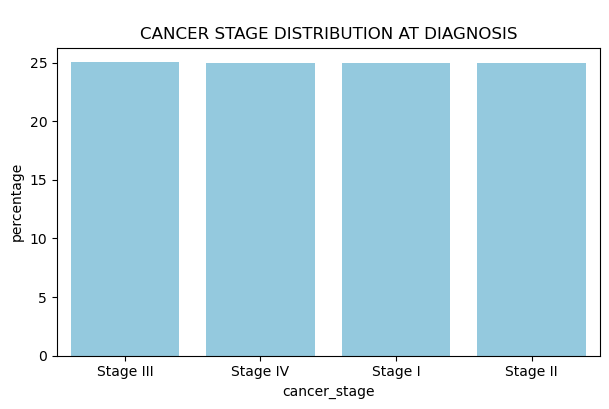

In [79]:
plt.figure(figsize=(7,4))
sns.barplot(x='cancer_stage',y='percentage',data=stage_count,color="skyblue")
plt.title("\nCANCER STAGE DISTRIBUTION AT DIAGNOSIS")
print()
plt.show()

III) TREATMENT EFFECTIVENESS AND PATTERNS

1) Which treatment types (Chemotherapy, Surgery, Radiation, Combined)
   yield the highest survival rates for each cancer stage?

In [48]:
high_survival=data.groupby('treatment_type')['survived'].mean()*100
high_survival=high_survival.reset_index(name='mean_of_survivors')
print("\nTOP 2 CANCER TREATMENT TYPES WHICH SHOW HIGHEST SURVIVAL RATES:\n")
high_survival.sort_values(by='mean_of_survivors',ascending=False).head(2)


TOP 2 CANCER TREATMENT TYPES WHICH SHOW HIGHEST SURVIVAL RATES:



,treatment_type,mean_of_survivors
3,Surgery,22.149860
2,Radiation,22.055707


2) What treatment method is most commonly used, and does it vary by cancer stage?

In [58]:
print("\nMOST COMMONLY USED TREATMENT TYPE\n")
data['treatment_type'].value_counts().reset_index(name="count").sort_values(by='count',ascending=False).head(1)


MOST COMMONLY USED TREATMENT TYPE



,treatment_type,count
0,Chemotherapy,223262


<Figure size 700x500 with 0 Axes>

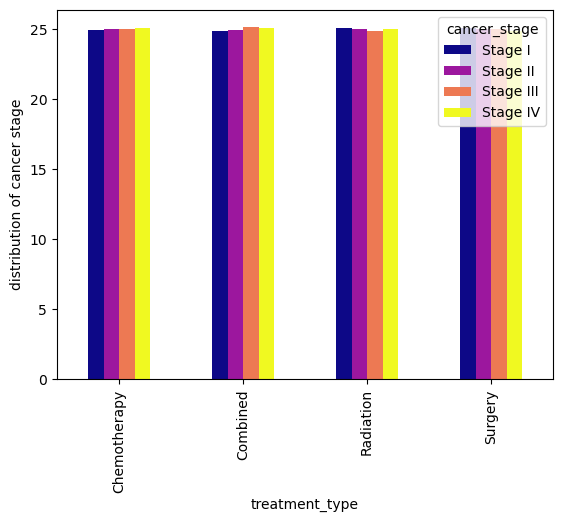

In [11]:
# showing how treatment types vary across different cancer stages

treatment_by_stage=pd.crosstab(data['treatment_type'],data['cancer_stage'],normalize='index')*100
plt.figure(figsize=(7,5))
treatment_by_stage.plot(kind='bar',cmap='plasma')
plt.ylabel("distribution of cancer stage")
print()
plt.show()

3) What is the survival rate for patients receiving combination treatment vs. single treatment methods?

In [13]:
treatment_group=data['treatment_type'].apply(lambda x:'combined' if x=='Combined' else 'single')
df=pd.DataFrame(treatment_group)
df['survived']=data['survived']
survival_rate=df.groupby('treatment_type')['survived'].mean()*100
survival_rate=survival_rate.reset_index(name='survival_rate').round()
print("\nsurvival rate for patients receiving combination treatment vs. single treatment methods\n")
survival_rate


survival rate for patients receiving combination treatment vs. single treatment methods



,treatment_type,survival_rate
0,combined,22.0
1,single,22.0


4) What is the average treatment duration from diagnosis to completion, and how does this impact survival?

firstly calculating avg duration based on treatment type

In [14]:
avg_duration=data.groupby('treatment_type')['treatment_duration'].mean().round(3).reset_index(name='average_duration(days)')

then ,calculation survival rates based on treatment types

In [15]:
survival_by_treatment=data.groupby('treatment_type')['survived'].mean()*100
survival_by_treatment=survival_by_treatment.reset_index(name='survival_rate(%)').round(2)

finally merging both dataframes based on treatment types

In [16]:
print("\nrelating survival probability with treatment type and its duration\n")
avg_duration.merge(survival_by_treatment,on='treatment_type')


relating survival probability with treatment type and its duration



,treatment_type,average_duration(days),survival_rate(%)
0,Chemotherapy,458.395,21.87
1,Combined,457.815,22.01
2,Radiation,458.403,22.06
3,Surgery,457.737,22.15


5) Are treatment durations shorter in patient profiles or countries with higher survival rates?

creating patient profile 

In [121]:
profile=data.groupby(['age_group','cancer_stage'],observed=True).agg({'survived':'mean','treatment_duration':'mean' }).reset_index()
profile['survived']=(profile['survived']*100).round(2)
profile['treatment_duration']=profile['treatment_duration'].round(2)
profile

,age_group,cancer_stage,survived,treatment_duration
0,0-40,Stage I,21.77,512.70
1,0-40,Stage II,21.76,476.94
2,0-40,Stage III,21.77,440.85
3,0-40,Stage IV,21.64,403.70
4,41-60,Stage I,21.89,512.41
5,41-60,Stage II,22.05,475.79
6,41-60,Stage III,22.09,440.45
7,41-60,Stage IV,22.16,403.00
8,61-80,Stage I,21.64,513.11
9,61-80,Stage II,22.26,475.81


creating country wise patient statistics

In [123]:
country_stats=data.groupby(['country'],observed=True).agg({'survived':'mean','treatment_duration':'mean' }).reset_index()
country_stats['survived']=(country_stats['survived']*100).round(2)
country_stats['treatment_duration']=country_stats['treatment_duration'].round(2)
country_stats

,country,survived,treatment_duration
0,Austria,21.79,458.62
1,Belgium,21.96,457.98
2,Bulgaria,22.04,458.92
3,Croatia,21.99,457.79
4,Cyprus,22.04,457.46
5,Czech Republic,22.29,458.90
6,Denmark,21.94,457.58
7,Estonia,22.31,458.31
8,Finland,22.25,458.73
9,France,21.58,457.47


treatment duration by country vs avg duration

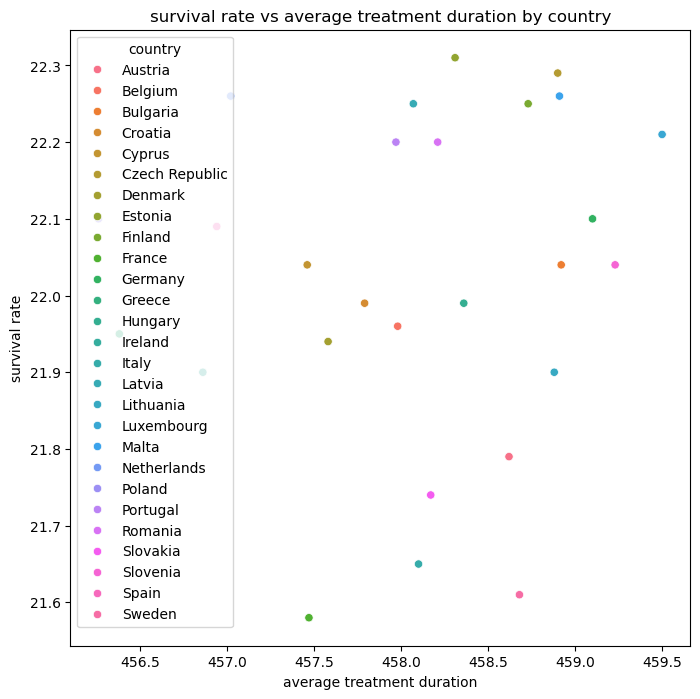

In [145]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='treatment_duration',y='survived',hue='country',data=country_stats)
plt.title('survival rate vs average treatment duration by country')
plt.xlabel('average treatment duration')
plt.ylabel('survival rate')
plt.show()

survival rate vs avg duration  by patient profile

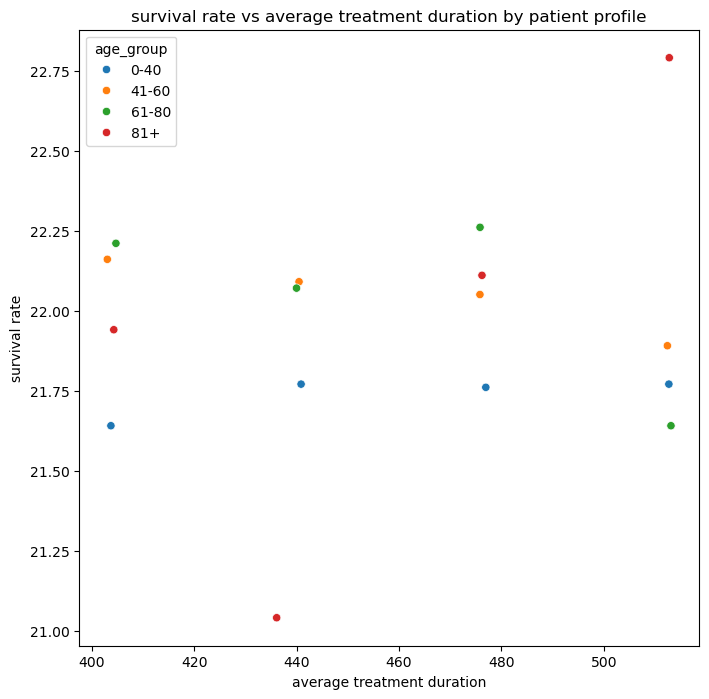

In [146]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='treatment_duration',y='survived',hue='age_group',data=profile)
plt.title('survival rate vs average treatment duration by patient profile')
plt.xlabel('average treatment duration')
plt.ylabel('survival rate')
plt.show()

IV ) LIFE STYLE FACTORS AND RISK ASSESSMENT

1) How does smoking status correlate with survival rates and cancer stage severity?

dataframe relating smoking status and survival rates

In [17]:
smoke_survival=data.groupby('smoking_status')['survived'].mean()*100
smoke_survival=smoke_survival.reset_index(name='survival_rate')
print("\nSurvival Rates by Smoking Status:\n\n",smoke_survival)


Survival Rates by Smoking Status:

    smoking_status  survival_rate
0  Current Smoker      22.033998
1   Former Smoker      21.964074
2    Never Smoked      22.091034
3  Passive Smoker      22.002509


In [18]:
smoke_cancer_stage=pd.crosstab(data['smoking_status'],data['cancer_stage'],normalize='index')*100
print("\nCancer Stage Distribution by Smoking Status (%):\n\n",smoke_cancer_stage)


Cancer Stage Distribution by Smoking Status (%):

 cancer_stage      Stage I   Stage II  Stage III   Stage IV
smoking_status                                            
Current Smoker  25.046643  24.979495  25.106130  24.867732
Former Smoker   24.973333  25.069200  24.952629  25.004838
Never Smoked    25.034680  24.900449  24.950730  25.114141
Passive Smoker  24.952727  24.989470  25.032935  25.024869


2) How do different BMI levels affect survival rates and post-treatment outcomes?

creating a dataframe containing bmi groups and survied status

In [42]:
d=pd.cut(data['bmi'],bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal_weight', 'Overweight', 'Obese'],  right=False)
d=pd.DataFrame(d)
d['survived']=data['survived']
d.columns=['bmi_category','survived']
d

,bmi_category,survived
0,Overweight,0
1,Obese,1
2,Obese,0
3,Obese,0
4,Normal_weight,0
...,...,...
889995,Obese,0
889996,Normal_weight,0
889997,Obese,1
889998,Normal_weight,0


calculating survival rates by bmi_group

<Axes: xlabel='bmi_category', ylabel='survival rate'>

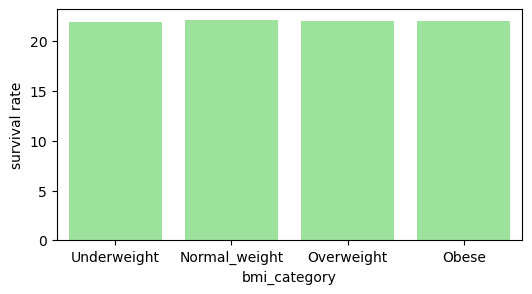

In [58]:
survival_bmi=d.groupby('bmi_category',observed=True)['survived'].mean()*100
survival_bmi=survival_bmi.reset_index(name='survival rate')
plt.figure(figsize=(6,3))
sns.barplot(x='bmi_category',y='survival rate',data=survival_bmi,color='lightgreen')

V) COMORBIDITIES AND HEALTH CONDITION

1) How do comorbidities like asthma, hypertension, or liver cirrhosis affect cancer stage and survival rates?

creating a comobordities data frame

In [87]:
comorbidities = ['asthma', 'hypertension', 'cirrhosis']
lis= []
for i in comorbidities:
    temp = data[[i, 'cancer_stage', 'survived']].copy()
    temp['comorbidity'] = i
    temp['has_comorbidity'] = temp[i].map({1: 'Yes', 0: 'No'})
    lis.append(temp[['comorbidity', 'has_comorbidity', 'cancer_stage', 'survived']])
comorbidity_df = pd.concat(comorbidity_data)
comorbidity_df

,cirrhosis,cancer_stage,survived,comorbidity,has_comorbidity
0,1,Stage I,0,cirrhosis,Yes
1,0,Stage III,1,cirrhosis,No
2,0,Stage III,0,cirrhosis,No
3,0,Stage I,0,cirrhosis,No
4,0,Stage I,0,cirrhosis,No
...,...,...,...,...,...
889995,1,Stage IV,0,cirrhosis,Yes
889996,0,Stage II,0,cirrhosis,No
889997,0,Stage III,1,cirrhosis,No
889998,0,Stage IV,0,cirrhosis,No


visualizing comobordities vs survival rate

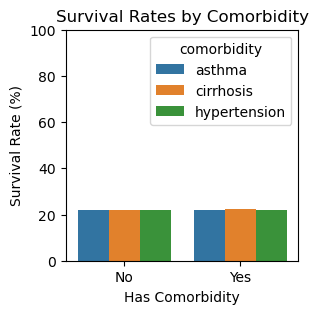

In [73]:
survival_rates = comorbidity_df.groupby(['comorbidity', 'has_comorbidity'])['survived'].mean() * 100
survival_rates = survival_rates.round(1).reset_index(name='survival_rate')
plt.figure(figsize=(3, 3))
sns.barplot(x='has_comorbidity', y='survival_rate', hue='comorbidity', data=survival_rates)
plt.title('Survival Rates by Comorbidity')
plt.xlabel('Has Comorbidity')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

2) What are the survival rates for patients with multiple comorbidities compared to those with single conditions?

In [96]:
comorbidity_df.loc[:, 'comorbidity_count'] = data[comorbidities].sum(axis=1)
comorbidity_df['comorbidity_group'] = comorbidity_df['comorbidity_count'].apply(lambda x: 'Single' if x == 1 else 'Multiple')
comorbidity_df

,comorbidity,has_comorbidity,cancer_stage,survived,comorbidity_count,comorbidity_group
0,asthma,No,Stage I,0,1,Single
1,asthma,Yes,Stage III,1,2,Multiple
2,asthma,Yes,Stage III,0,2,Multiple
3,asthma,Yes,Stage I,0,2,Multiple
5,asthma,No,Stage I,0,1,Single
...,...,...,...,...,...,...
889992,cirrhosis,Yes,Stage II,0,3,Multiple
889993,cirrhosis,No,Stage IV,0,1,Single
889995,cirrhosis,Yes,Stage IV,0,3,Multiple
889997,cirrhosis,No,Stage III,1,1,Single


survival rates by comorbidity

In [99]:
survival_rates = comorbidity_df.groupby(['comorbidity_group'])['survived'].mean() * 100
survival_rates = survival_rates.round(1).reset_index(name='survival_rate')

Survival Rates by Comorbidity Group

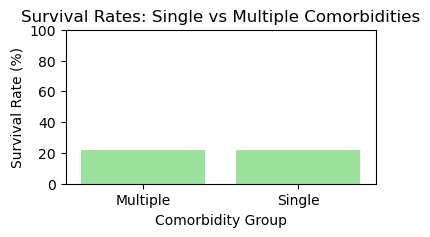

In [110]:
plt.figure(figsize=(4, 2))
sns.barplot(x='comorbidity_group', y='survival_rate', data=survival_rates, color='lightgreen')
plt.title('Survival Rates: Single vs Multiple Comorbidities')
plt.xlabel('Comorbidity Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

VI) FAMILY HISTORY AND GENETIC FACTORS

1) Does family history of cancer lead to diagnosis at earlier ages, and what are their survival rates?

calculating mean age by family history

  family_history  mean_age
0             No     55.02
1            Yes     55.00 




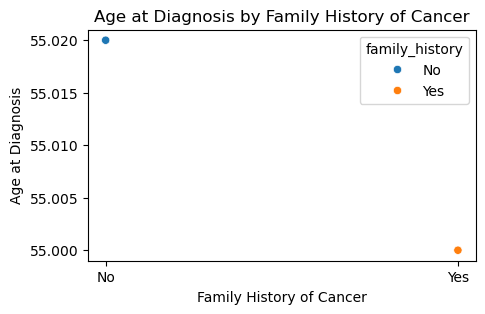

In [24]:
mean_age_by_family_history=data.groupby('family_history')['age'].mean().round(2).reset_index(name='mean_age')
print(mean_age_by_family_history,"\n\n")

plt.figure(figsize=(5,3))
sns.scatterplot(x='family_history', y='mean_age', data=mean_age_by_family_history,hue="family_history")
plt.title('Age at Diagnosis by Family History of Cancer')
plt.xlabel('Family History of Cancer')
plt.ylabel('Age at Diagnosis')
plt.show()

calculating survival rates by family history

calculating survival rates by family history

  family_history  survival_rate
0             No          21.97
1            Yes          22.08 




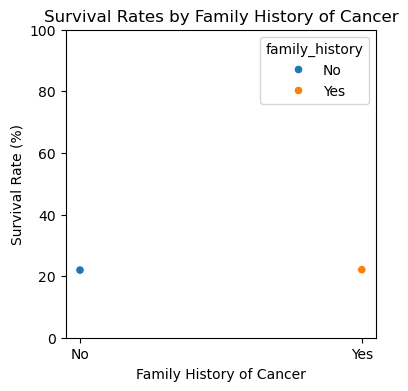

In [30]:
survival_by_family_history=data.groupby('family_history')['survived'].mean()*100
survival_by_family_history=survival_by_family_history.round(2).reset_index(name='survival_rate')
print(survival_by_family_history,'\n\n')

plt.figure(figsize=(4,4))
sns.scatterplot(x='family_history', y='survival_rate', data=survival_by_family_history, hue='family_history')
plt.title('Survival Rates by Family History of Cancer')
plt.xlabel('Family History of Cancer')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

2) Do patients with family history tend to be diagnosed at earlier stages compared to those without?

creating a data frame showing relationship bw family history and cancer stages

In [32]:
stage_distribution = pd.crosstab(data['family_history'], data['cancer_stage'], normalize='index') * 100
stage_distribution = stage_distribution.round(1).reset_index()
stage_distribution

cancer_stage,family_history,Stage I,Stage II,Stage III,Stage IV
0,No,25.1,24.9,25.0,25.0
1,Yes,24.9,25.1,25.0,25.0


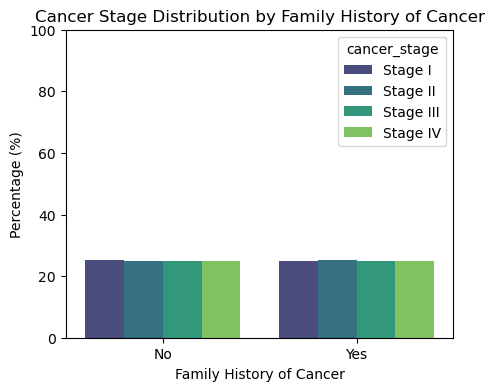

In [44]:
stage_distribution_melted = stage_distribution.melt(id_vars='family_history', 
                                                    value_vars=['Stage I', 'Stage II', 'Stage III', 'Stage IV'], 
                                                    var_name='cancer_stage', value_name='percentage')
plt.figure(figsize=(5, 4))
sns.barplot(x='family_history', y='percentage', hue='cancer_stage', data=stage_distribution_melted,palette='viridis')
plt.title('Cancer Stage Distribution by Family History of Cancer')
plt.xlabel('Family History of Cancer')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()

VII) MULTIPLE CANCER CASES

1) How does the presence of additional cancers impact treatment effectiveness and survival probability?

In [39]:
cancer_group = data['other_cancer'].apply(lambda x: 'Single' if x == 0 else 'Multiple')
df=pd.DataFrame({ 'cancer_group':cancer_group
})
df['survived']=data['survived']
df

,cancer_group,survived
0,Single,0
1,Single,1
2,Single,0
3,Single,0
4,Single,0
...,...,...
889995,Single,0
889996,Single,0
889997,Single,1
889998,Single,0


In [43]:
survival_rates = df.groupby('cancer_group')['survived'].mean() * 100
survival_rates = survival_rates.round(1).reset_index(name='survival_rate')
survival_rates

,cancer_group,survival_rate
0,Multiple,21.8
1,Single,22.0


2)Does having multiple cancers significantly decrease overall survival rates?

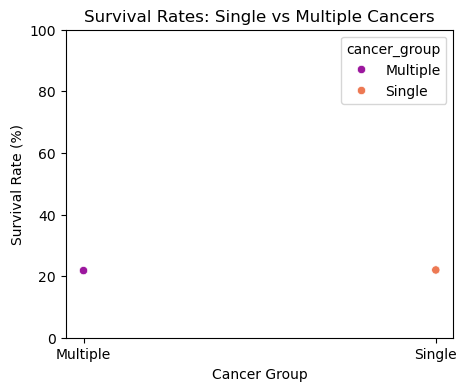

In [47]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='cancer_group', y='survival_rate', data=survival_rates, hue='cancer_group',palette='plasma')
plt.title('Survival Rates: Single vs Multiple Cancers')
plt.xlabel('Cancer Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

VIII) TIME BASED ANALYSIS AND TRENDS

1) How many patients have both diagnosis and end treatment dates, and what is their recovery time span?

In [57]:
print("\nsummary of patients have both diagnosis and end treatment dates, and what is their recovery time span\n")
data['treatment_duration'].describe()


summary of patients have both diagnosis and end treatment dates, and what is their recovery time span



count    890000.000000
mean        458.087170
std         139.326048
min         183.000000
25%         367.000000
50%         458.000000
75%         550.000000
max         730.000000
Name: treatment_duration, dtype: float64

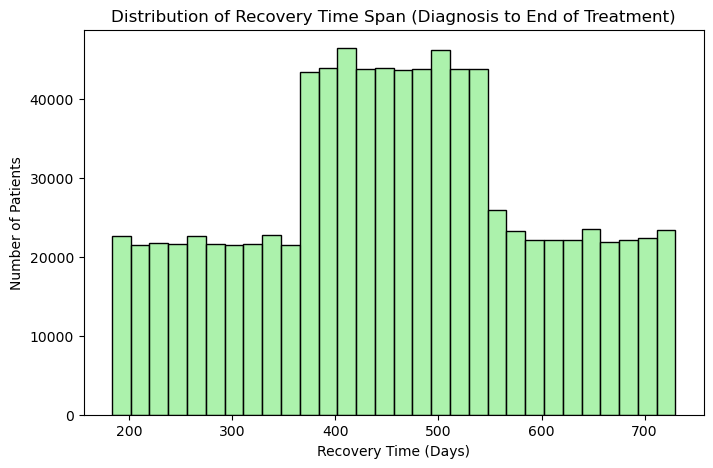

In [59]:
plt.figure(figsize=(8, 5))
sns.histplot(data=patients_with_both_dates, x='treatment_duration', bins=30, color='lightgreen')
plt.title('Distribution of Recovery Time Span (Diagnosis to End of Treatment)')
plt.xlabel('Recovery Time (Days)')
plt.ylabel('Number of Patients')
plt.show()

2)How does the time from diagnosis to treatment completion affect survival outcomes?

creating a dataframe containing info about recovery days ,survival probabilities and recovery groups

In [20]:
df=pd.DataFrame({'recovery_time_days':data['treatment_duration'],
                 'survived':data['survived']
                 })
df['recovery_time_group']=pd.cut(df['recovery_time_days'], 
                                         bins=[0, 185, 385,750 ], 
                                         labels=['Short (<120 days)', 'Medium (120-240 days)', 'Long (>240 days)'], 
                                         right=False)
df

,recovery_time_days,survived,recovery_time_group
0,523,0,Long (>240 days)
1,424,1,Long (>240 days)
2,370,0,Medium (120-240 days)
3,443,0,Long (>240 days)
4,406,0,Long (>240 days)
...,...,...,...
889995,237,0,Medium (120-240 days)
889996,631,0,Long (>240 days)
889997,302,1,Medium (120-240 days)
889998,721,0,Long (>240 days)


calculating survival rate by recovery duration groups

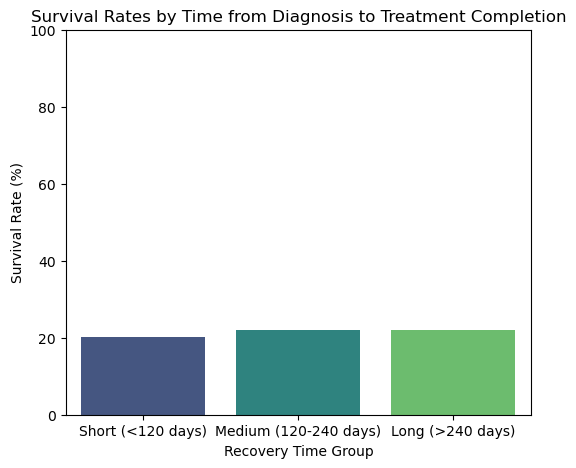

In [21]:
survival_rate=(df.groupby('recovery_time_group',observed=True)['survived'].mean()*100).round(3).reset_index(name='survival_rate')
plt.figure(figsize=(6, 5))
sns.barplot(x='recovery_time_group', y='survival_rate', data=survival_rate,hue='recovery_time_group',palette='viridis')
plt.title('Survival Rates by Time from Diagnosis to Treatment Completion')
plt.xlabel('Recovery Time Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()